In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:
len(data)

8124

In [5]:
data.size

186852

In [6]:
data["veil-type"]

0       p
1       p
2       p
3       p
4       p
       ..
8119    p
8120    p
8121    p
8122    p
8123    p
Name: veil-type, Length: 8124, dtype: object

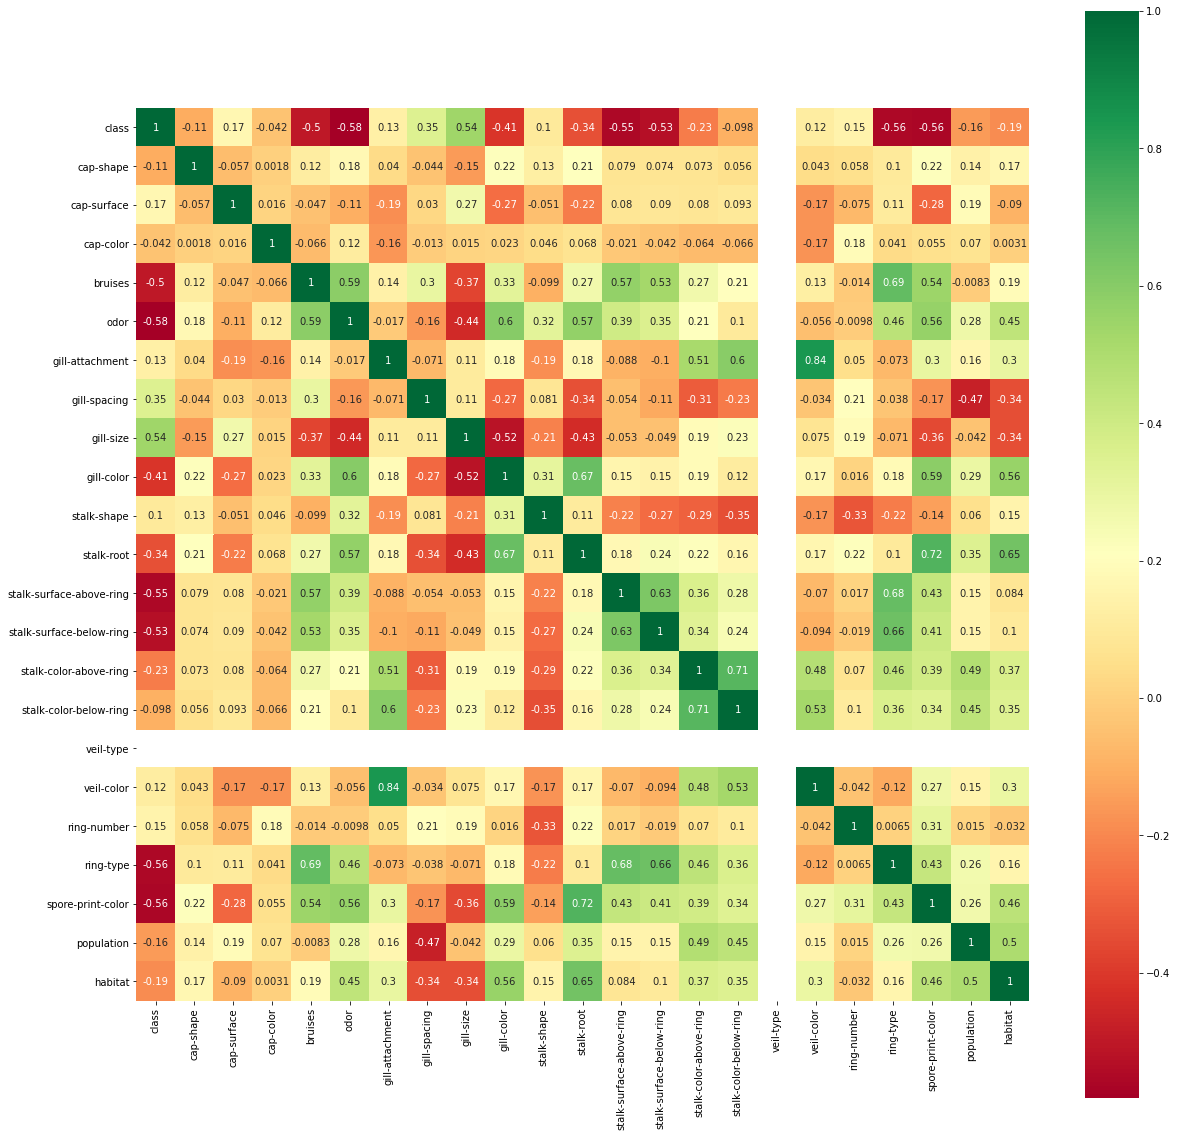

In [7]:
plt.figure(figsize=(20,20))
p = sns.heatmap(data.apply(lambda x: pd.factorize(x)[0]).corr(method='pearson', min_periods=1), annot=True,cmap='RdYlGn',square=True)

In [8]:
pd.get_dummies(data)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
'''data1 = pd.DataFrame()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in data:
    if data[i].dtype in numerics:
        data1[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())
    elif set(data[i].unique()) == {"yes","no","unknown"}:
        data1[i] = data[i].apply(lambda x: 1 if x == "yes" else (0 if x == "no" else 1/2))
    elif len(data[i].unique()) == 2:
        a, b = data[i].unique()
        data1[i] = data[i].apply(lambda x: 1 if x == a else 0)
    else:
        for j in data[i].unique():
            data1[i + "=" + j] = (data[i] == j).astype(int)
data1'''

'data1 = pd.DataFrame()\nnumerics = [\'int16\', \'int32\', \'int64\', \'float16\', \'float32\', \'float64\']\nfor i in data:\n    if data[i].dtype in numerics:\n        data1[i] = (data[i] - data[i].min())/(data[i].max()-data[i].min())\n    elif set(data[i].unique()) == {"yes","no","unknown"}:\n        data1[i] = data[i].apply(lambda x: 1 if x == "yes" else (0 if x == "no" else 1/2))\n    elif len(data[i].unique()) == 2:\n        a, b = data[i].unique()\n        data1[i] = data[i].apply(lambda x: 1 if x == a else 0)\n    else:\n        for j in data[i].unique():\n            data1[i + "=" + j] = (data[i] == j).astype(int)\ndata1'

In [10]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


<Figure size 1440x1440 with 0 Axes>

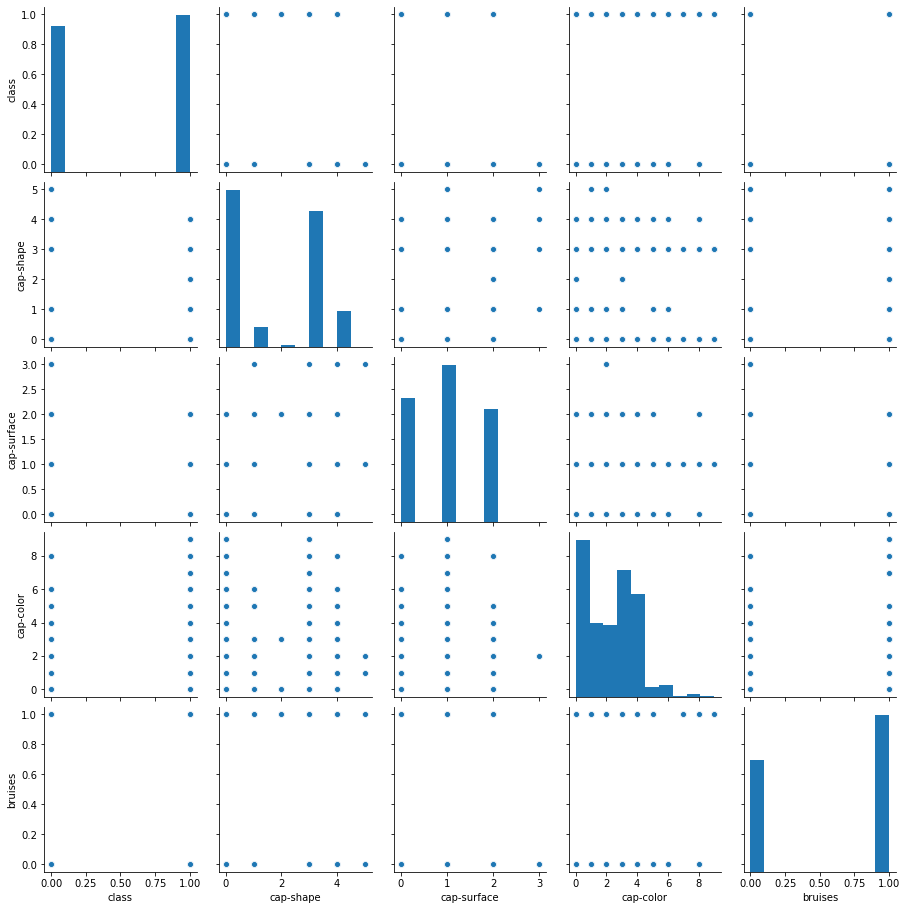

In [11]:
plt.figure(figsize=(20,20))
sns.pairplot(data.apply(lambda x: pd.factorize(x)[0]).iloc[:,[x for x in range(0,5)]])
plt.show()

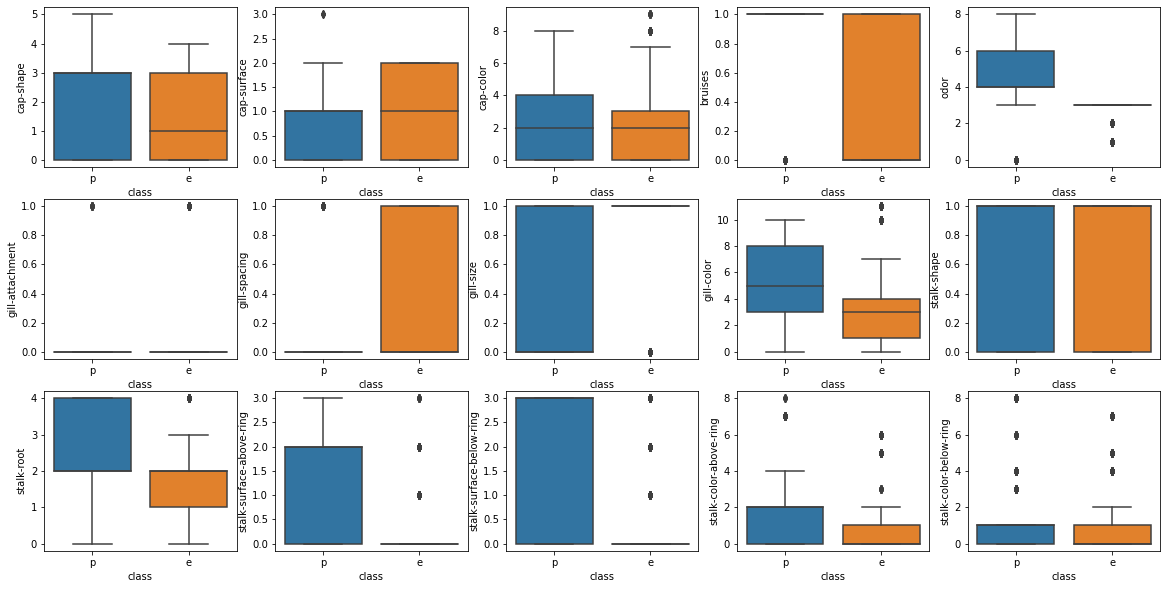

In [12]:
plt.figure(figsize=(20,10))
for i in range(1,16):
    plt.subplot(3,5,i)
    sns.boxplot(x = data['class'], y = data.apply(lambda x: pd.factorize(x)[0]).iloc[:,i])

In [13]:
data1 = data.drop(["class","veil-type"], axis = 1)
data1 = data1.apply(lambda x: pd.factorize(x)[0])
data1 = data1/data1.max()
data1["class"]=data["class"].apply(lambda x: 1 if x == "e" else 0)

In [14]:
train, test = train_test_split(data1, test_size = 0.3)
train_X = train.drop(["class"], axis=1)
train_Y = train["class"]
test_X = test.drop(["class"], axis=1)
test_Y = test["class"]

# KNeighborsClassifier

In [15]:
grid_params = {'n_neighbors':np.arange(1,10)}
gs = GridSearchCV(KNeighborsClassifier(), grid_params)
k = gs.fit(train_X,train_Y)
print("ac =",k.best_score_)
print("k =",k.best_params_['n_neighbors'])

ac = 1.0
k = 1


In [16]:
model = KNeighborsClassifier(n_neighbors=k.best_params_['n_neighbors'])
model.fit(train_X,train_Y)
metrics.accuracy_score(model.predict(test_X),test_Y)

1.0

In [17]:
target_names = ['p','e']
print(classification_report(test_Y, model.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1198
           e       1.00      1.00      1.00      1240

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
for i in confusion_matrix(test_Y, model.predict(test_X), labels=[1,0]):
    print(i)

[1240    0]
[   0 1198]


# DecisionTreeClassifier

In [19]:
grid_params = {'max_depth':np.arange(1,20)}
gs = GridSearchCV(DecisionTreeClassifier(), grid_params)
k = gs.fit(train_X,train_Y)
print("ac =",k.best_score_)
print("k =",k.best_params_['max_depth'])

ac = 0.9996485061511423
k = 8


0.9995898277276456


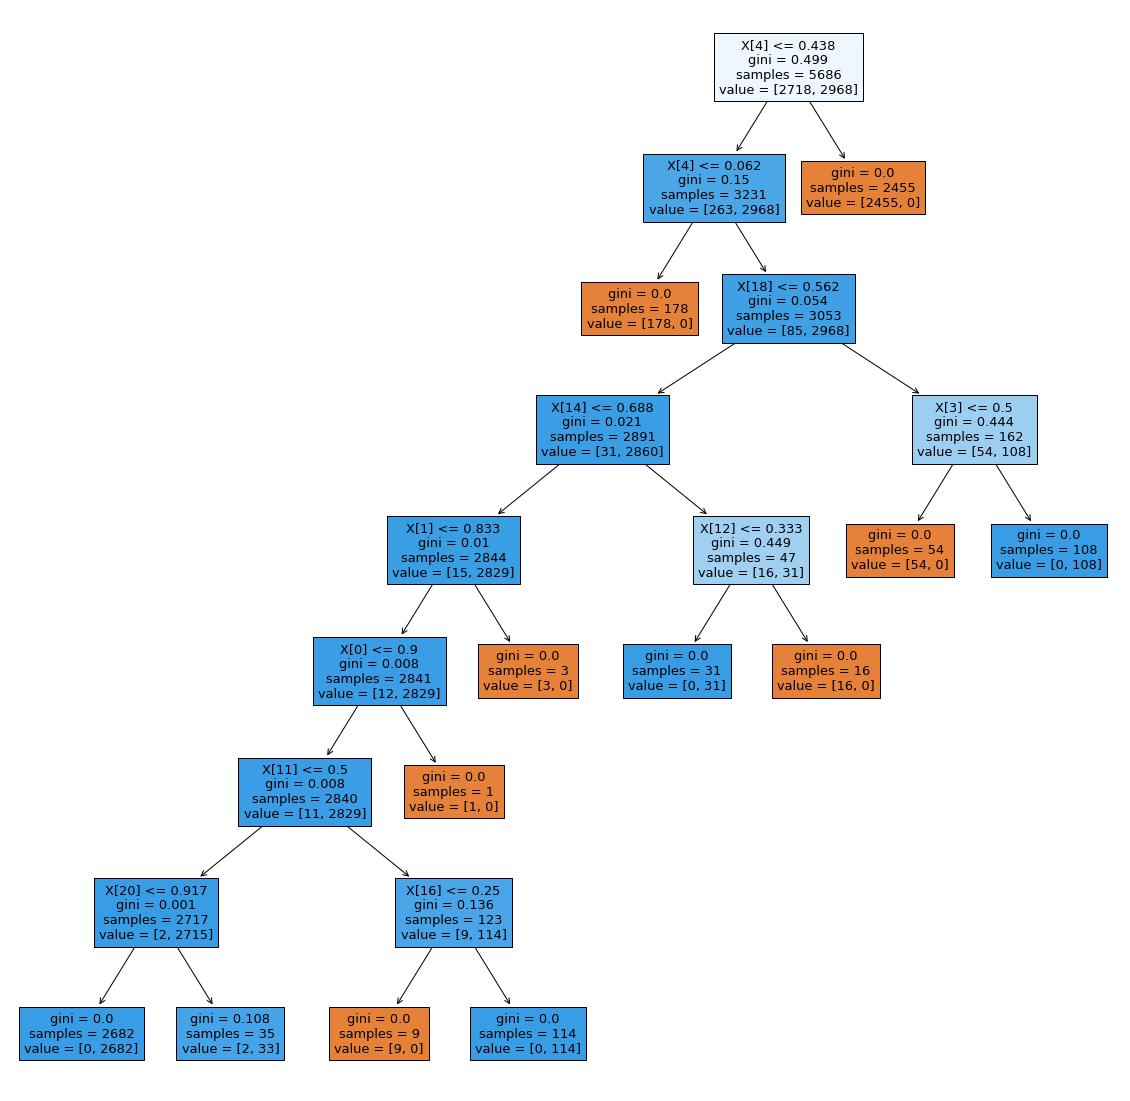

In [20]:
model = DecisionTreeClassifier(max_depth = k.best_params_['max_depth'])
model.fit(train_X,train_Y)
print(metrics.accuracy_score(model.predict(test_X),test_Y))
plt.figure(figsize=(20,20))
x = tree.plot_tree(model,filled=True)

In [21]:
target_names = ['p','e']
print(classification_report(test_Y, model.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1198
           e       1.00      1.00      1.00      1240

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [22]:
for i in confusion_matrix(test_Y, model.predict(test_X), labels=[1,0]):
    print(i)

[1240    0]
[   1 1197]


# SVM 

In [23]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
gs = GridSearchCV(SVC(),param_grid)
k = gs.fit(train_X,train_Y)
print("ac =",k.best_score_)
print("С =",k.best_params_['C'],"gamma =",k.best_params_['gamma'],"kernel =",k.best_params_['kernel'])

ac = 1.0
С = 1 gamma = 1 kernel = rbf


In [24]:
model = SVC(kernel = k.best_params_['kernel'], C = k.best_params_['C'], gamma = k.best_params_['gamma'])
model.fit(train_X,train_Y)
print(metrics.accuracy_score(model.predict(test_X),test_Y))

1.0


In [25]:
target_names = ['p','e']
print(classification_report(test_Y, model.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1198
           e       1.00      1.00      1.00      1240

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [26]:
for i in confusion_matrix(test_Y, model.predict(test_X), labels=[1,0]):
    print(i)

[1240    0]
[   0 1198]


# RandomForestClassifier

In [27]:
grid_params = {'max_depth':np.arange(1,10),'n_estimators': [150,200,250,300]}
gs = GridSearchCV(RandomForestClassifier(), grid_params)
k = gs.fit(train_X,train_Y)
print("ac =",k.best_score_)
print("k =",k.best_params_['max_depth'], "number =", k.best_params_['n_estimators'])

ac = 1.0
k = 7 number = 150


In [28]:
model = RandomForestClassifier(max_depth = k.best_params_['max_depth'], n_estimators = k.best_params_['n_estimators'])
model.fit(train_X,train_Y)
print(metrics.accuracy_score(model.predict(test_X),test_Y))

1.0


In [29]:
target_names = ['p','e']
print(classification_report(test_Y, model.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1198
           e       1.00      1.00      1.00      1240

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [30]:
for i in confusion_matrix(test_Y, model.predict(test_X), labels=[1,0]):
    print(i)

[1240    0]
[   0 1198]


# AdaBoostClassifier

In [31]:
grid_params = {'learning_rate':np.arange(0.2,1,0.2),'n_estimators': np.arange(50,200,50)}
gs = GridSearchCV(AdaBoostClassifier(), grid_params)
k = gs.fit(train_X,train_Y)
print("ac =",k.best_score_)
print("k =",k.best_params_['learning_rate'], "number =", k.best_params_['n_estimators'])

ac = 1.0
k = 0.4 number = 50


In [32]:
model = AdaBoostClassifier(learning_rate = k.best_params_['learning_rate'], n_estimators = k.best_params_['n_estimators'])
model.fit(train_X,train_Y)
print(metrics.accuracy_score(model.predict(test_X),test_Y))

1.0


In [33]:
target_names = ['p','e']
print(classification_report(test_Y, model.predict(test_X), target_names=target_names))

              precision    recall  f1-score   support

           p       1.00      1.00      1.00      1198
           e       1.00      1.00      1.00      1240

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [34]:
for i in confusion_matrix(test_Y, model.predict(test_X), labels=[1,0]):
    print(i)

[1240    0]
[   0 1198]
